In [3]:
from shapesynthesis.datasets.shapenetcore import ShapeNet15kPointClouds

cates = ["airplane"]
root_dir = "../data/shapenet/raw/ShapeNetCore.v2.PC15k"
tr_dataset = ShapeNet15kPointClouds(
        categories=cates,
        split="train",
        tr_sample_size=2048,
        te_sample_size=2048,
        scale=1,
        root_dir=root_dir,
        normalize_per_shape=False,
        normalize_std_per_axis=False,
        random_subsample=True,
    )
val_dataset = ShapeNet15kPointClouds(
    categories=cates,
    split="val",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1,
    root_dir=root_dir,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    all_points_mean=tr_dataset.all_points_mean,
    all_points_std=tr_dataset.all_points_std,
)

te_dataset = ShapeNet15kPointClouds(
    categories=cates,
    split="test",
    tr_sample_size=2048,
    te_sample_size=2048,
    scale=1,
    root_dir=root_dir,
    normalize_per_shape=False,
    normalize_std_per_axis=False,
    all_points_mean=tr_dataset.all_points_mean,
    all_points_std=tr_dataset.all_points_std,
)


['airplane']
Total number of data:2832
Min number of points: (train)2048 (test)2048
['airplane']
Total number of data:405
Min number of points: (train)2048 (test)2048
['airplane']
Total number of data:808
Min number of points: (train)2048 (test)2048


In [4]:

import torch 
te_scales = []
tr_scales = []
val_scales = []

val_pts = []
train_pts = []

for data in te_dataset: 
    te_scales.append(data["test_points"].norm(dim=-1).max())
    


for data in tr_dataset: 
    tr_scales.append(data["test_points"].norm(dim=-1).max())
    train_pts.append(data["test_points"].unsqueeze(0))


for data in val_dataset: 
    val_scales.append(data["test_points"].norm(dim=-1).max())
    val_pts.append(data["test_points"].unsqueeze(0))

tr_scales = torch.vstack(tr_scales).numpy()
te_scales = torch.vstack(te_scales).numpy()
val_scales = torch.vstack(val_scales).numpy()

train_pts = torch.cat(train_pts)
val_pts = torch.cat(val_pts)

print(train_pts.shape)





torch.Size([2832, 2048, 3])


<Axes: ylabel='Count'>

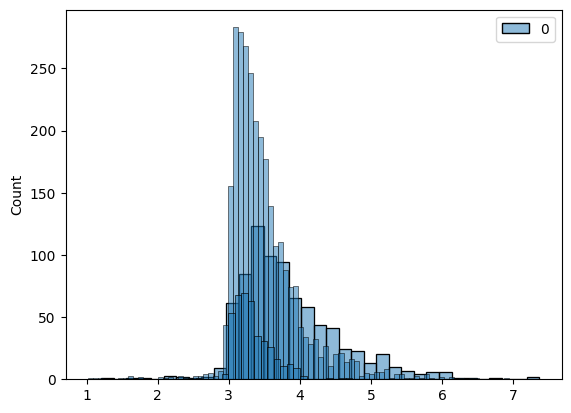

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns 

sns.histplot(te_scales,color='blue',label="Test point scales")
sns.histplot(tr_scales,color='red',label="Train point scales")
sns.histplot(val_scales,color='green',label="Validation point scales")

<Axes: ylabel='Count'>

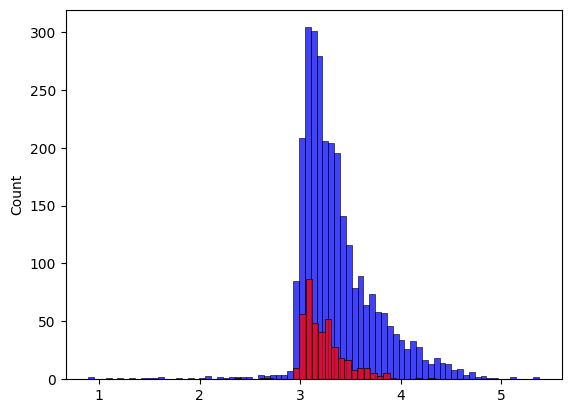

In [6]:

train_means = train_pts.mean(dim=1,keepdim=True)
val_means = val_pts.mean(dim=1,keepdim=True)

train_intrinsic_scales = (train_pts-train_means).norm(dim=-1).max(dim=-1)[0]
val_intrinsic_scales = (val_pts-val_means).norm(dim=-1).max(dim=-1)[0]

sns.histplot(x=train_intrinsic_scales.numpy(),color='blue',label="Train")
sns.histplot(x=val_intrinsic_scales.numpy(),color='red',label="Validation")



NameError: name 'pvd_airplane' is not defined


```
{'lgan_mmd-CD': tensor(0.0156),
 'lgan_cov-CD': tensor(0.4642),
 'lgan_mmd_smp-CD': tensor(0.0667),
 'lgan_mmd-EMD': tensor(0.2479),
 'lgan_cov-EMD': tensor(0.5210),
 'lgan_mmd_smp-EMD': tensor(0.5638),
 '1-NN-CD-acc_t': tensor(0.7852),
 '1-NN-CD-acc_f': tensor(0.5704),
 '1-NN-CD-acc': tensor(0.6778),
 '1-NN-EMD-acc_t': tensor(0.6420),
 '1-NN-EMD-acc_f': tensor(0.5654),
 '1-NN-EMD-acc': tensor(0.6037)}
```